In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [19]:
sales_data = pd.read_csv('Advertising.csv')
sales_data

TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

In [20]:
print(sales_data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [21]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
sales_data.shape

(200, 4)

In [23]:
sales_data.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

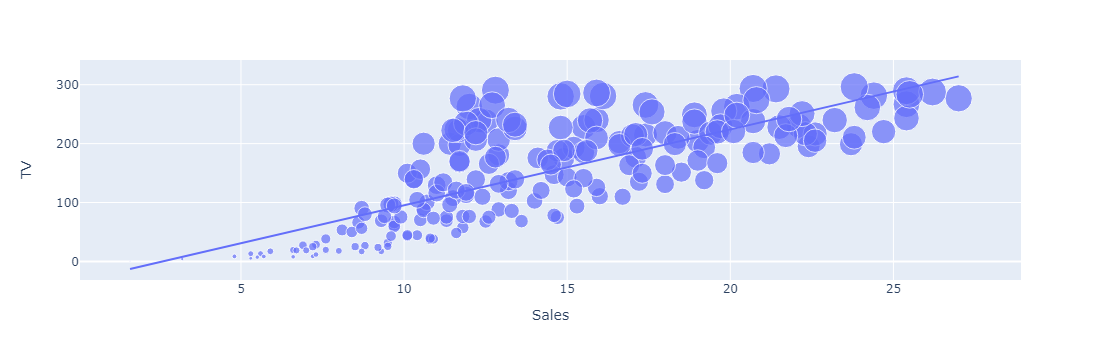

In [24]:
import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame = sales_data, x="Sales", y="TV", size="TV", trendline="ols")
figure.show()

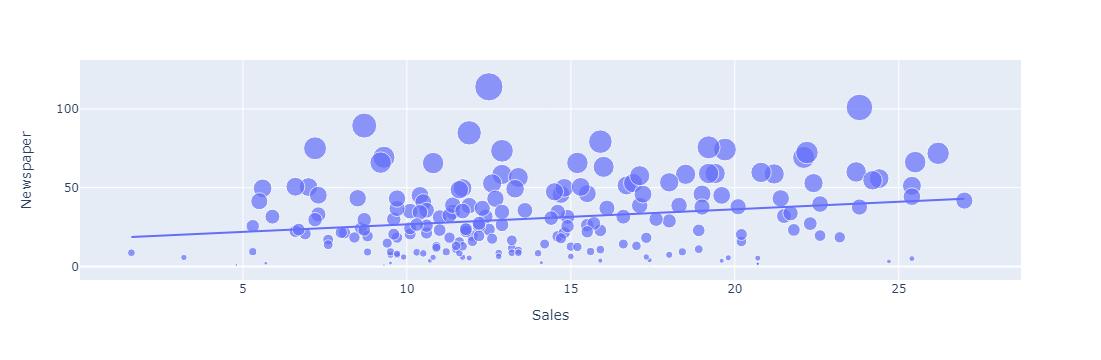

In [25]:
figure = px.scatter(data_frame = sales_data, x="Sales", y="Newspaper", size="Newspaper", trendline="ols")
figure.show()

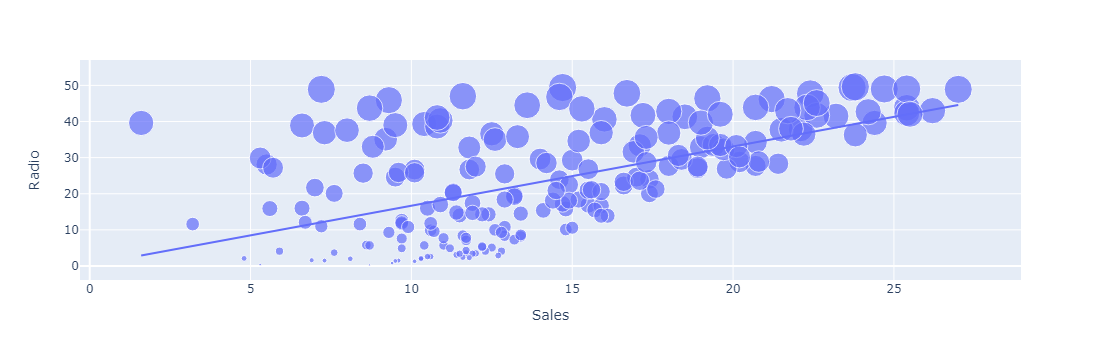

In [26]:
figure = px.scatter(data_frame = sales_data, x="Sales", y="Radio", size="Radio", trendline="ols")
figure.show()

In [27]:
correlation = sales_data.corr()
print(correlation["Sales"])

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64


In [28]:
x = sales_data.drop(columns = 'Sales', axis = 1)
y = sales_data['Sales']
print(x)
print(y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [30]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(160, 3) (160,) (40, 3) (40,)


In [31]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [35]:
print(y_pred)
print(y_test)

[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]
95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64


In [40]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score


In [41]:
print('R-sqr value:',r2_score(y_pred,y_test))

R-sqr value: 0.8791069137120033


In [42]:
print("mean absolute error rate :",mean_absolute_error(y_pred,y_test))

mean absolute error rate : 1.4607567168117606


In [45]:
input_data = np.array([[10,17,12]])#if i invest 10,17 and 12 dollars respectively on tv,newspaper and radio then 7 products will be sold
print(model.predict(input_data))

[6.67581181]


C:\Users\dhrit\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

